In [57]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import svm, linear_model, neural_network, naive_bayes, neighbors, tree, ensemble, linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn import preprocessing
from tqdm import tqdm_notebook as tqdm
import time
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

In [101]:
kval = [1, 3, 5, 9, 17, 33, 65, 129, 257, 513]
w = ['uniform', 'distance']
conf=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
ridge=[0.00000001, 0.000001, 0.0001, 0.01, 1, 10, 100, 1000, 10000, 100000]
kval_knn = [1, 3, 5, 9, 17, 33, 65, 129, 257, 313]
file = ['electricity-normalized','pc4','MagicTelescope','irish','pc1','tic-tac-toe','ionosphere','diabetes']

In [117]:
p='{0:.8f}'.format(ridge[0])


'0.00000001'

In [59]:
files = os.path.join(os.getcwd(),'Result/C45', "*.csv")
print(files)
data = glob.glob(files)
len(data)
data.sort()
#data

/home/pranav/Project/Result/C45/*.csv


In [60]:
for j in range(len(data)):
    #print(data[j])
    df = pd.read_csv(data[j])
    df1 = df.as_matrix()
    #print(df)

In [61]:
p1=str(0.1)
p2=str(1)
s='/home/pranav/Project/Result/C45/'+file[2]+'CONF'+p1+'KVAL'+p2+'.csv'

print(s)
dfq = pd.read_csv(s)
#dfq
len(file)
conf[0]

/home/pranav/Project/Result/C45/MagicTelescopeCONF0.1KVAL1.csv


0.1

In [75]:
#C45
n_datasets = len(file)
p1_c45 = 9
p2_c45 = 10
shape2 = (n_datasets, p1_c45, p2_c45)
accuracies_c45 = np.zeros(shape2)
f1_scores_c45 = np.zeros(shape2)
build_time_c45 = np.zeros(shape2)
for k in range(len(file)):
    for i in range(p1_c45):
        for j in range(p2_c45):
            
            #print(s)
            
            p1=str(conf[i])
            p2=str(kval[j])
            s='/home/pranav/Project/Result/C45/'+file[k]+'CONF'+p1+'KVAL'+p2+'.csv'
            df = pd.read_csv(s)
            df1 = df.as_matrix()
            check1=0
            check2=0
            for q in range(len(df1)):
                df2 = str(df1[q,0])
                if 'Correctly' in df2:
                    check1=check1+1
                    #print(check1)
                    if check1 == 2:
                        #print(df2[57:64])
                        x=(float(df2[57:64])/100)
                        #x=float(x)
                        #print(x)
                if 'Weighted' in df2:
                    check2=check2+1
                    #print(check2)
                    if check2 == 2:
                        y=float(df2[55:60])
                        #print(y)
            
                if 'Time taken to build model' in df2:
                    z=float(df2[27:31])
                    #print(z)
            
        
            accuracies_c45[k,i,j] = x
            f1_scores_c45[k,i,j] = y
            build_time_c45[k,i,j] = z

In [74]:
for d in range(len(file)):
    sf1 = pd.DataFrame(accuracies_c45[d], columns=kval, index=conf)
    sf2 = pd.DataFrame(f1_scores_c45[d], columns=kval, index=conf)
    sf3 = pd.DataFrame(build_time_c45[d], columns=kval, index=conf)
    y=str(d)
    path1 = '/home/pranav/Project/results_weka/c45/d_' + y + '_' +file[d] + '_acc_c45' 
    sf1.to_csv(path_or_buf=path1)
    path2 = '/home/pranav/Project/results_weka/c45/d_' + y + '_' +file[d] + '_fm_c45' 
    sf2.to_csv(path_or_buf=path2)
    path3 = '/home/pranav/Project/results_weka/c45/d_' + y + '_' +file[d] + '_bt_c45' 
    sf3.to_csv(path_or_buf=path3)

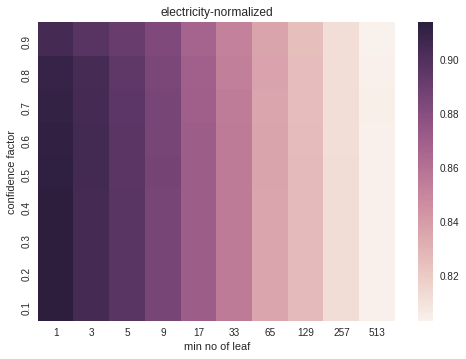

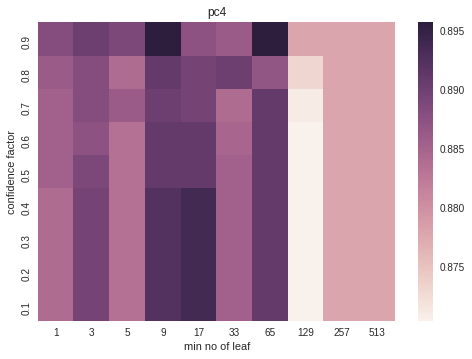

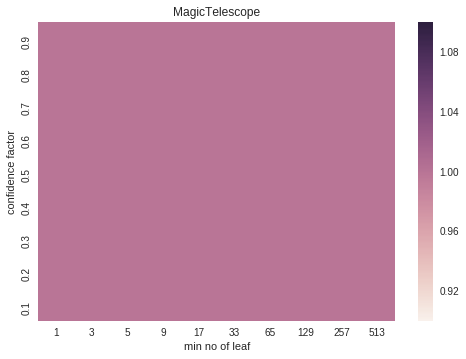

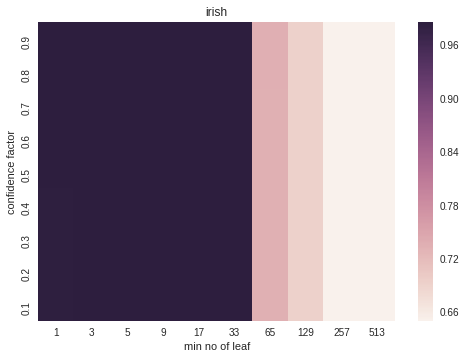

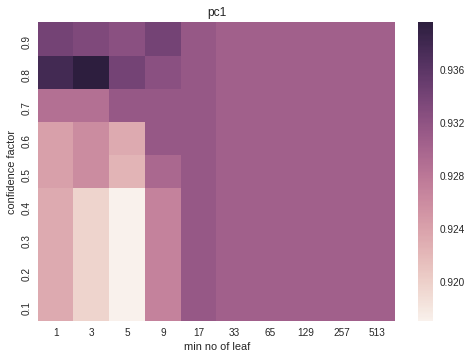

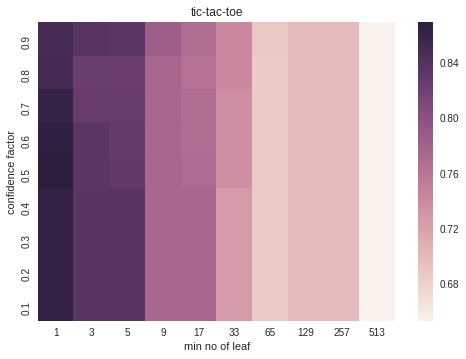

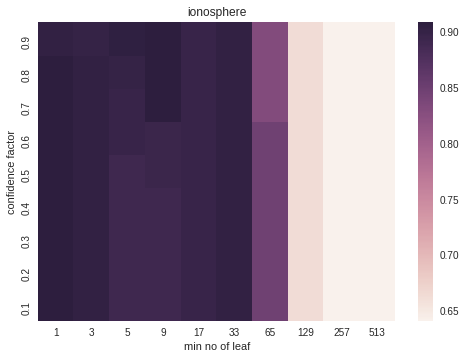

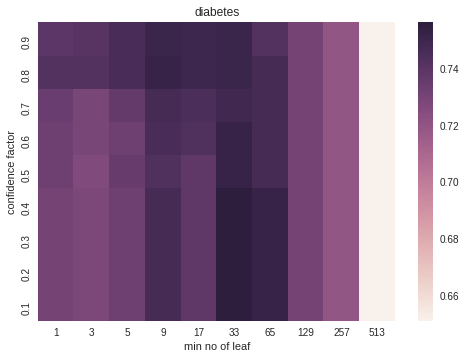

In [76]:
for d in range(len(file)):
    ax = sns.heatmap(accuracies_c45[d], xticklabels=kval, yticklabels=conf[::-1])
    plt.xlabel('min no of leaf')
    plt.ylabel('confidence factor')
    plt.title(file[d])
    plt.show()

In [79]:
#KNN
n_datasets = len(file)
p1_knn = 2
p2_knn = 10
shape2 = (n_datasets, p1_knn, p2_knn)
accuracies_knn = np.zeros(shape2)
f1_scores_knn = np.zeros(shape2)
build_time_knn = np.zeros(shape2)
for k in range(len(file)):
    for i in range(p1_knn):
        for j in range(p2_knn):
            
            #print(s)
            
            #p1=str(conf[i])
            p2=str(kval[j])
            if i == 0:
                s='/home/pranav/Project/Result/KNN/'+file[k]+'FOR_'+'KVAL'+p2+'.csv'
            if i == 1:
                s='/home/pranav/Project/Result/KNN/'+file[k]+'INVERSE_FOR_'+'KVAL'+p2+'.csv'
            df = pd.read_csv(s)
            df1 = df.as_matrix()
            check1=0
            check2=0
            for q in range(len(df1)):
                df2 = str(df1[q,0])
                if 'Correctly' in df2:
                    check1=check1+1
                    #print(check1)
                    if check1 == 2:
                        #print(df2[57:64])
                        x=(float(df2[57:64])/100)
                        #x=float(x)
                        #print(x)
                if 'Weighted' in df2:
                    check2=check2+1
                    #print(check2)
                    if check2 == 2:
                        y=float(df2[55:60])
                        #print(y)
            
                if 'Time taken to build model' in df2:
                    z=float(df2[27:31])
                    #print(z)
            
        
            accuracies_knn[k,i,j] = x
            f1_scores_knn[k,i,j] = y
            build_time_knn[k,i,j] = z

In [81]:
for d in range(len(file)):
    sf1 = pd.DataFrame(accuracies_knn[d], columns=kval, index=w)
    sf2 = pd.DataFrame(f1_scores_knn[d], columns=kval, index=w)
    sf3 = pd.DataFrame(build_time_knn[d], columns=kval, index=w)
    x=str(d)
    path1 = '/home/pranav/Project/results_weka/knn/d_' + x + '_' +file[d] + '_acc_knn' 
    sf1.to_csv(path_or_buf=path1)
    path2 = '/home/pranav/Project/results_weka/knn/d_' + x + '_' +file[d] + '_fm_knn' 
    sf2.to_csv(path_or_buf=path2)
    path3 = '/home/pranav/Project/results_weka/knn/d_' + x + '_' +file[d] + '_bt_knn' 
    sf3.to_csv(path_or_buf=path3)

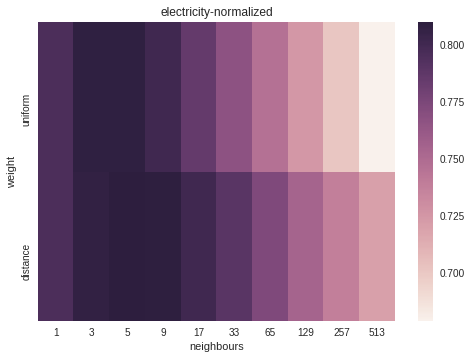

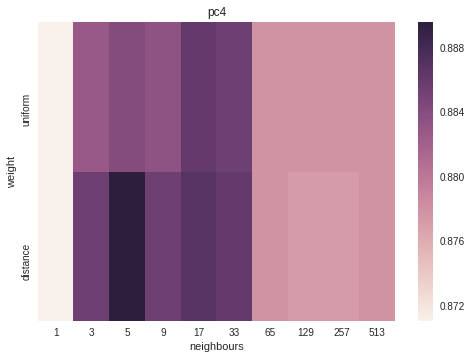

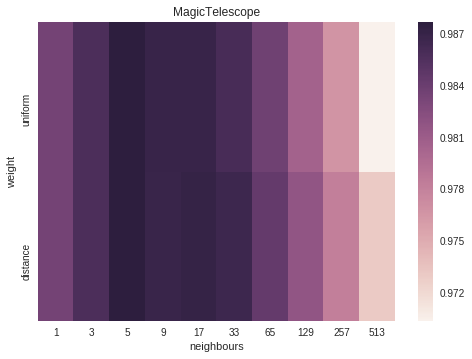

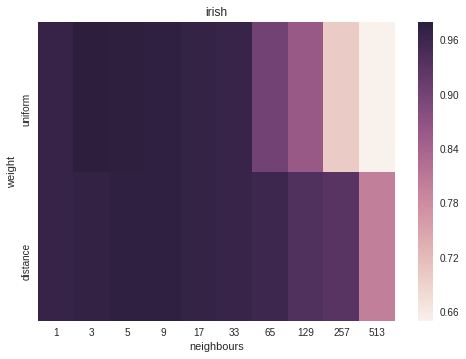

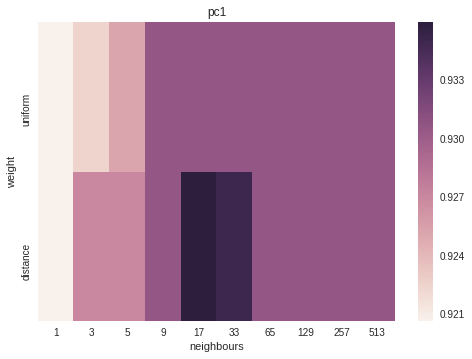

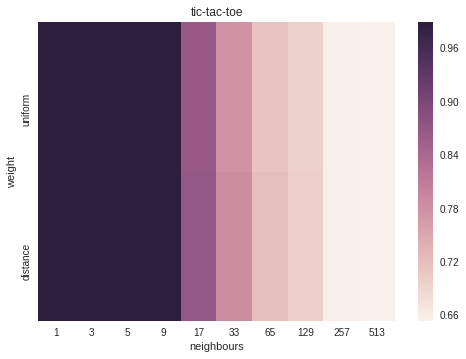

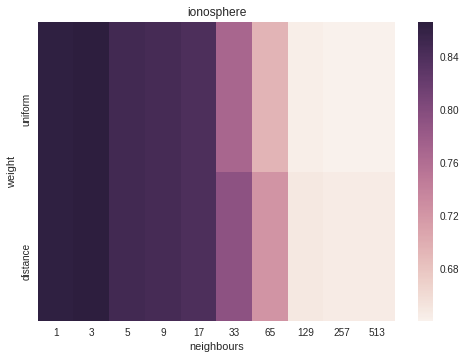

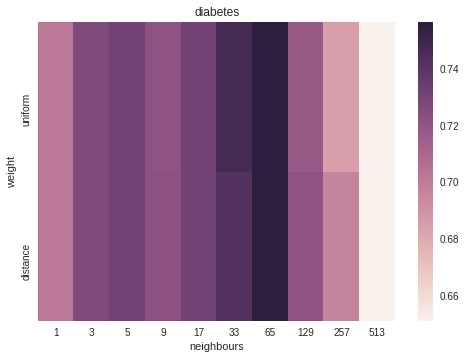

In [82]:
for d in range(len(file)):
    ax = sns.heatmap(accuracies_knn[d], xticklabels=kval, yticklabels=w)
    #plt.xticks(np.arange(accuracies[0].shape[1]), kval)
    plt.xlabel('neighbours')
    plt.ylabel('weight')
    plt.title(file[d])
    plt.show()


In [89]:
#RandomForest
n_datasets = len(file)
p1_rf = 10
p2_rf = 10
shape2 = (n_datasets, p1_rf, p2_rf)
accuracies_rf = np.zeros(shape2)
f1_scores_rf = np.zeros(shape2)
build_time_rf = np.zeros(shape2)
for k in range(len(file)):
    for i in range(p1_rf):
        for j in range(p2_rf):
            
            print(s)
            
            p1=str(kval[i])
            p2=str(kval[j])
            s='/home/pranav/Project/Result/RandomForest/'+file[k]+'NTREE'+p1+'KVAL'+p2+'.csv'
            df = pd.read_csv(s)
            df1 = df.as_matrix()
            check1=0
            check2=0
            for q in range(len(df1)):
                df2 = str(df1[q,0])
                if 'Correctly' in df2:
                    check1=check1+1
                    #print(check1)
                    if check1 == 2:
                        #print(df2[57:64])
                        x=(float(df2[57:64])/100)
                        #x=float(x)
                        #print(x)
                if 'Weighted' in df2:
                    check2=check2+1
                    #print(check2)
                    if check2 == 2:
                        y=float(df2[55:60])
                        #print(y)
            
                if 'Time taken to build model' in df2:
                    z=float(df2[27:31])
                    #print(z)
            
        
            accuracies_rf[k,i,j] = x
            f1_scores_rf[k,i,j] = y
            build_time_rf[k,i,j] = z

/home/pranav/Project/Result/RandomForest/diabetesNTREE257KVAL513.csv
/home/pranav/Project/Result/RandomForest/electricity-normalizedNTREE1KVAL1.csv
/home/pranav/Project/Result/RandomForest/electricity-normalizedNTREE1KVAL3.csv
/home/pranav/Project/Result/RandomForest/electricity-normalizedNTREE1KVAL5.csv
/home/pranav/Project/Result/RandomForest/electricity-normalizedNTREE1KVAL9.csv
/home/pranav/Project/Result/RandomForest/electricity-normalizedNTREE1KVAL17.csv
/home/pranav/Project/Result/RandomForest/electricity-normalizedNTREE1KVAL33.csv
/home/pranav/Project/Result/RandomForest/electricity-normalizedNTREE1KVAL65.csv
/home/pranav/Project/Result/RandomForest/electricity-normalizedNTREE1KVAL129.csv
/home/pranav/Project/Result/RandomForest/electricity-normalizedNTREE1KVAL257.csv
/home/pranav/Project/Result/RandomForest/electricity-normalizedNTREE1KVAL513.csv
/home/pranav/Project/Result/RandomForest/electricity-normalizedNTREE3KVAL1.csv
/home/pranav/Project/Result/RandomForest/electricity-

In [90]:
for d in range(len(file)):
    sf1 = pd.DataFrame(accuracies_rf[d], columns=kval, index=kval)
    sf2 = pd.DataFrame(f1_scores_rf[d], columns=kval, index=kval)
    sf3 = pd.DataFrame(build_time_rf[d], columns=kval, index=kval)
    z=str(d)
    path1 = '/home/pranav/Project/results_weka/randomforest/d_' + z + '_' +file[d] + '_acc_rf' 
    sf1.to_csv(path_or_buf=path1)
    path2 = '/home/pranav/Project/results_weka/randomforest/d_' + z + '_' +file[d] + '_fm_rf' 
    sf2.to_csv(path_or_buf=path2)
    path3 = '/home/pranav/Project/results_weka/randomforest/d_' + z + '_' +file[d] + '_bt_rf' 
    sf3.to_csv(path_or_buf=path3)

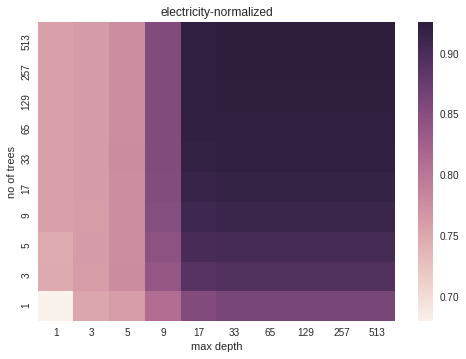

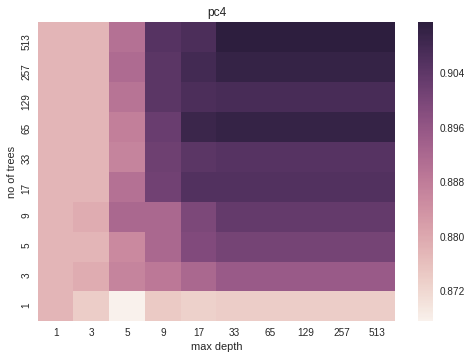

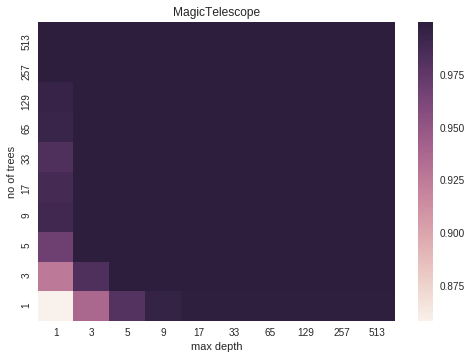

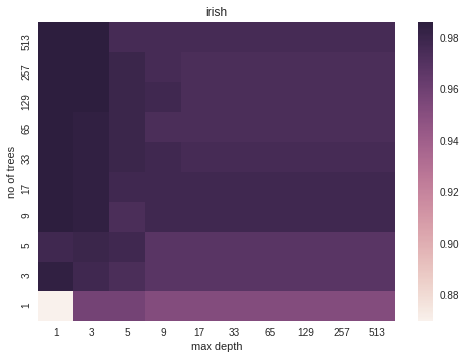

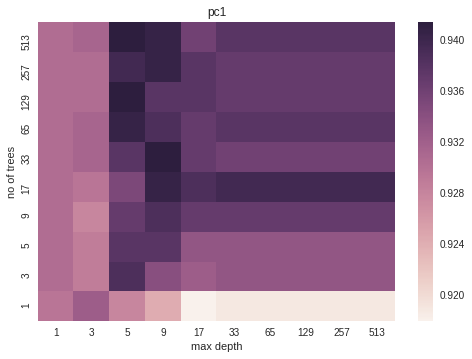

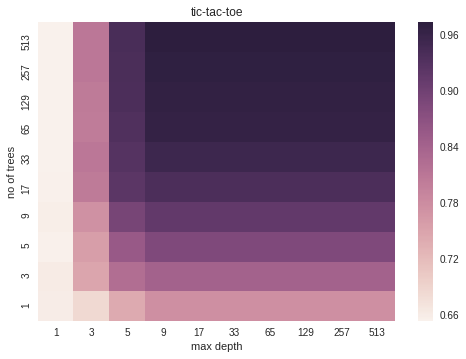

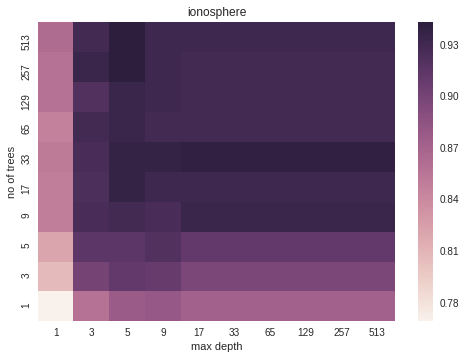

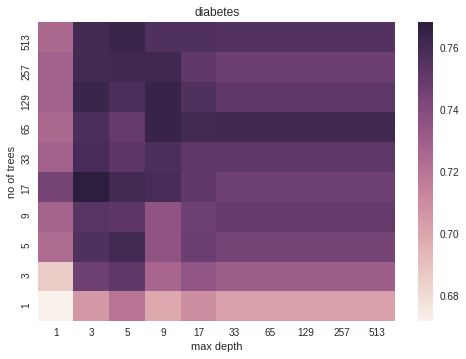

In [92]:
for d in range(len(file)):
    ax = sns.heatmap(accuracies_rf[d][::-1], yticklabels=kval[::-1], xticklabels=kval)
    plt.ylabel('no of trees')
    plt.xlabel('max depth')
    plt.title(file[d])
    plt.show()

In [120]:
#Logistic
n_datasets = len(file)
p1_lg = 10
p2_lg = 10
shape2 = (n_datasets, p1_lg, p2_lg)
accuracies_lg = np.zeros(shape2)
f1_scores_lg = np.zeros(shape2)
build_time_lg = np.zeros(shape2)
for k in range(len(file)):
    for i in range(p1_lg):
        for j in range(p2_lg):
            
            print(s)
            
            p1=str(kval[i])
            p2=str(ridge[j])
            if j == 0:
                 p2 ='{0:.8f}'.format(ridge[j])
            if j == 1:
                 p2 ='{0:.6f}'.format(ridge[j])
            s='/home/pranav/Project/Result/Logistic/'+file[k]+'ITER'+p1+'R'+p2+'.csv'
            df = pd.read_csv(s)
            df1 = df.as_matrix()
            check1=0
            check2=0
            for q in range(len(df1)):
                df2 = str(df1[q,0])
                if 'Correctly' in df2:
                    check1=check1+1
                    #print(check1)
                    if check1 == 2:
                        #print(df2[57:64])
                        x=(float(df2[57:64])/100)
                        #x=float(x)
                        #print(x)
                if 'Weighted' in df2:
                    check2=check2+1
                    #print(check2)
                    if check2 == 2:
                        y=float(df2[55:60])
                        #print(y)
            
                if 'Time taken to build model' in df2:
                    z=float(df2[27:31])
                    #print(z)
            
        
            accuracies_lg[k,i,j] = x
            f1_scores_lg[k,i,j] = y
            build_time_lg[k,i,j] = z

/home/pranav/Project/Result/Logistic/electricity-normalizedITER5R0.01.csv
/home/pranav/Project/Result/Logistic/electricity-normalizedITER1R0.00000001.csv
/home/pranav/Project/Result/Logistic/electricity-normalizedITER1R0.000001.csv
/home/pranav/Project/Result/Logistic/electricity-normalizedITER1R0.0001.csv
/home/pranav/Project/Result/Logistic/electricity-normalizedITER1R0.01.csv
/home/pranav/Project/Result/Logistic/electricity-normalizedITER1R1.csv
/home/pranav/Project/Result/Logistic/electricity-normalizedITER1R10.csv
/home/pranav/Project/Result/Logistic/electricity-normalizedITER1R100.csv
/home/pranav/Project/Result/Logistic/electricity-normalizedITER1R1000.csv
/home/pranav/Project/Result/Logistic/electricity-normalizedITER1R10000.csv
/home/pranav/Project/Result/Logistic/electricity-normalizedITER1R100000.csv
/home/pranav/Project/Result/Logistic/electricity-normalizedITER3R0.00000001.csv
/home/pranav/Project/Result/Logistic/electricity-normalizedITER3R0.000001.csv
/home/pranav/Projec

In [121]:
for d in range(len(file)):
    sf1 = pd.DataFrame(accuracies_lg[d], columns=kval, index=ridge)
    sf2 = pd.DataFrame(f1_scores_lg[d], columns=kval, index=ridge)
    sf3 = pd.DataFrame(build_time_lg[d], columns=kval, index=ridge)
    w=str(d)
    path1 = '/home/pranav/Project/results_weka/logistic/d_' + w + '_' +file[d] + '_acc_lg' 
    sf1.to_csv(path_or_buf=path1)
    path2 = '/home/pranav/Project/results_weka/logistic/d_' + w + '_' +file[d] + '_fm_lg' 
    sf2.to_csv(path_or_buf=path2)
    path3 = '/home/pranav/Project/results_weka/logistic/d_' + w + '_' +file[d] + '_bt_lg' 
    sf3.to_csv(path_or_buf=path3)

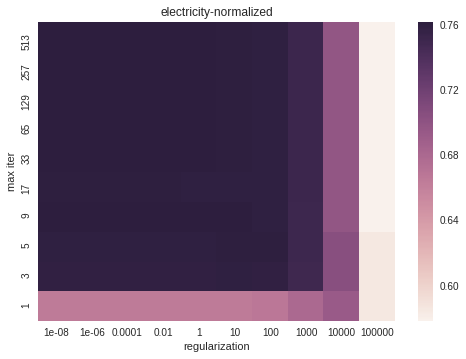

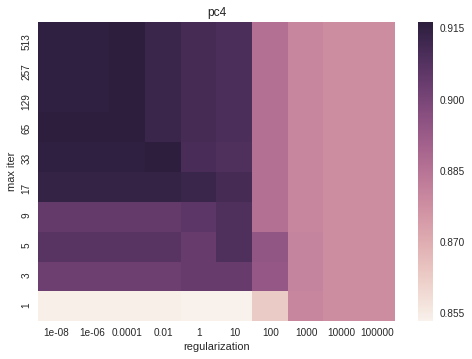

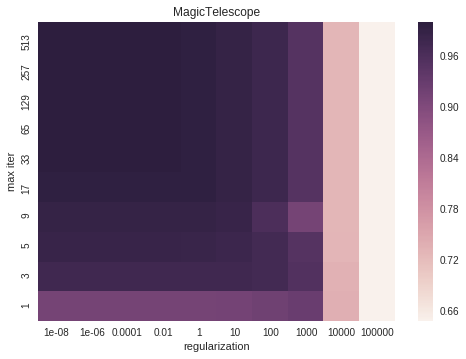

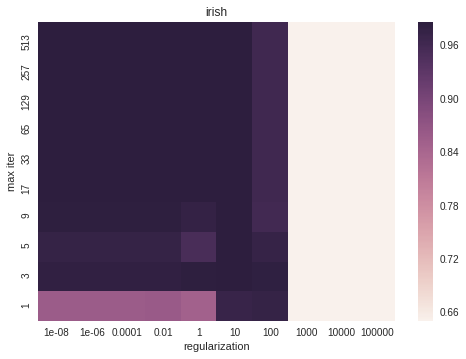

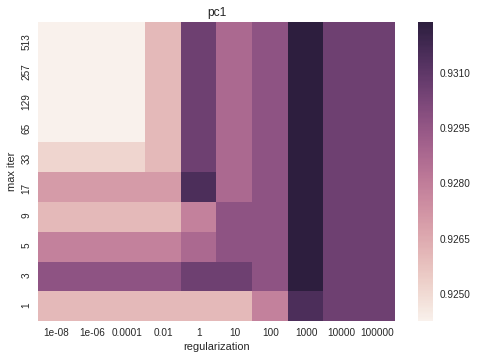

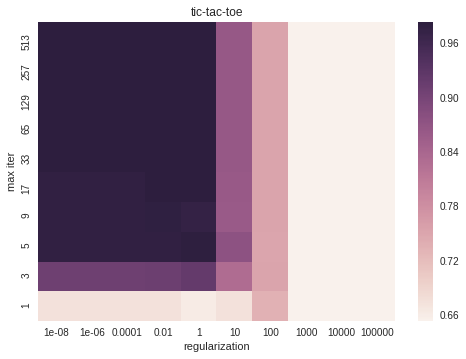

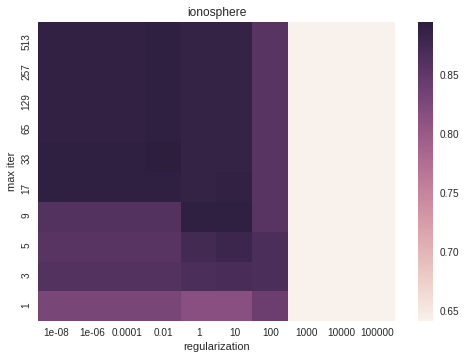

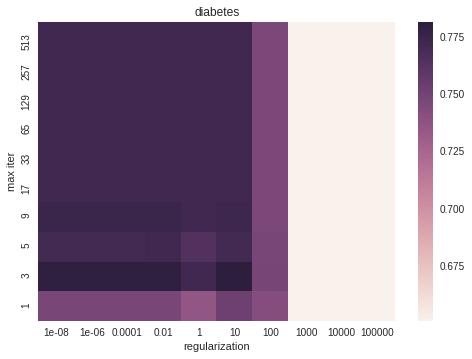

In [134]:
for d in range(len(file)):
    ax = sns.heatmap(accuracies_lg[d][::-1], yticklabels=kval[::-1], xticklabels=ridge)
    plt.ylabel('max iter')
    plt.xlabel('regularization')
    plt.title(file[d])
    #plt.savefig()
    plt.show()

In [45]:
df1 = df.as_matrix()
#print(df1)

In [119]:
df1.shape

(50, 1)

In [165]:
check1=0
check2=0
for i in range(len(df1)):
    df2 = str(df1[i,0])
    if 'Correctly' in df2:
        check1=check1+1
        print(check1)
        if check1 == 2:
            #print(df2[57:64])
            x=(float(df2[57:64])/100)
            #x=float(x)
            print(x)
    if 'Weighted' in df2:
        check2=check2+1
        print(check2)
        if check2 == 2:
            y=float(df2[55:60])
            print(y)
            
    if 'Time taken to build model' in df2:
        z=float(df2[27:31])
        print(z)
    

0.26
1
1
2
0.908832
2
0.907


In [109]:
s =['asfsgsd' 'fghsfg']

In [110]:
s1 = ''.join(s)
s1

'asfsgsdfghsfg'

In [111]:
'asf' in s1

True